In this project, we'll work with data scraped from [Wikipedia](https://www.wikipedia.org/). Volunteer content contributors and editors maintain Wikipedia by continuously improving content. Anyone can edit Wikipedia (we can read more about how to make an edit [here](https://en.wikipedia.org/wiki/Help:Editing)). Because Wikipedia is crowdsourced, it has rapidly assembled a huge library of articles.

In this project, we'll implement a simplified version of the [`grep` command-line utility](https://en.wikipedia.org/wiki/Grep) to search for data in `54` megabytes worth of articles. If we're not familiar with the `grep` command, the `grep` utility essentially allows searching for textual data in all files from a given directory.

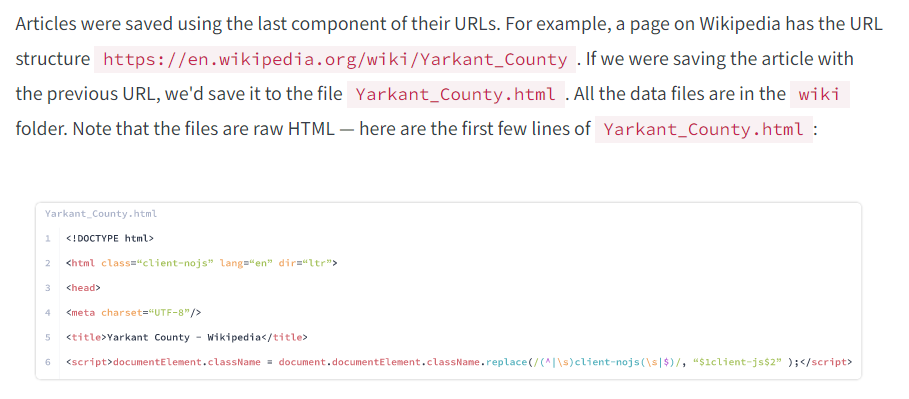

We don't need to understand HTML for this project. We're going to treat those files like plain-text and we won't rely on any of the specific structure of those files.

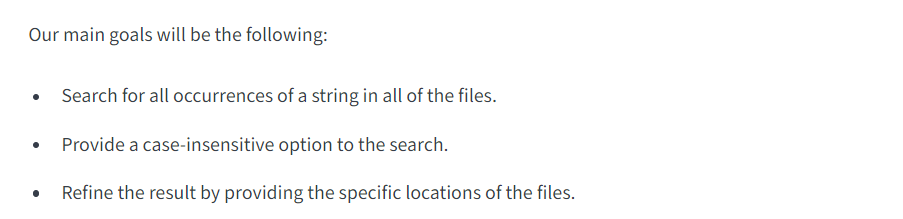

[solution](https://github.com/dataquestio/solutions/blob/master/Mission569Solutions.ipynb)

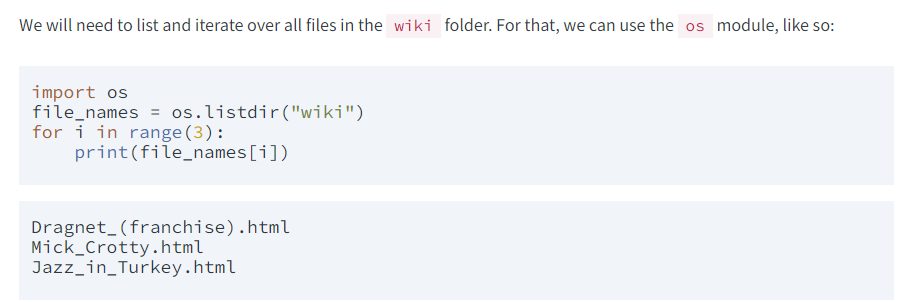

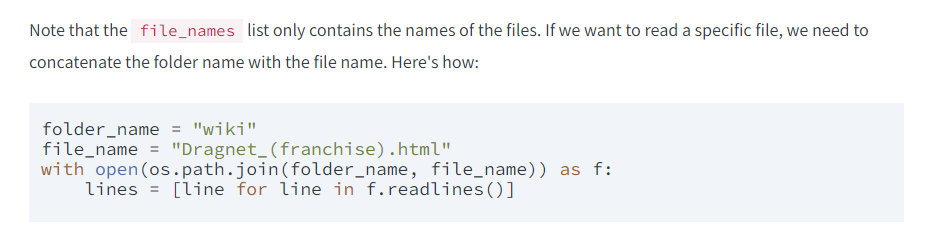

**Task**

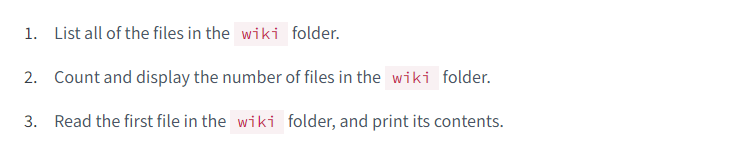

**Answer**

In [1]:
# We can create a list with the names of all files in the wiki folder using the os.listdir() function.

import os

file_names = os.listdir("wiki")
len(file_names)

7

### Read the first file

Let's read the first file and print its contents. We need to join the name of the file with the wiki folder. We can do this using the `os.path.join()` function.

In [2]:
with open(os.path.join("wiki", file_names[0]), encoding = "utf-8") as f:
    print(f.read())

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>100 Greatest Romanians - Wikipedia</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"100_Greatest_Romanians","wgTitle":"100 Greatest Romanians","wgCurRevisionId":739997309,"wgRevisionId":739997309,"wgArticleId":5885981,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Use dmy dates from November 2012","Articles containing Romanian-language text","Greatest Nationals","Lists of Romanian people","Romanian Television","Romanian television series"],"wgBreakFrames":false,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"w

In this project, we will use the `map_reduce()` function that we developed. Here's is the code so that we can use it on the project:

In [3]:
import math
import functools
from multiprocessing import Pool

def make_chunks(data, num_chunks):
    chunk_size = math.ceil(len(data) / num_chunks)
    return [data[i:i+chunk_size] for i in range(0, len(data), chunk_size)]

def map_reduce(data, num_processes, mapper, reducer):
    chunks = make_chunks(data, num_processes)
    pool = Pool(num_processes)
    chunk_results = pool.map(mapper, chunks)
    return functools.reduce(reducer, chunk_results)

Let's explore the data a little bit more and count the total number of lines in all files stored in the wiki folder. There are several ways to do this. One of them is actually to use MapReduce.

In [ ]:
# Count the total number of lines in all files using MapReduce.
# It was not required but can use MapReduce to count the total number of lines on all files in the wiki folder! 
# If we did in some other way, that is fine as well.

def map_line_count(file_names):
    total = 0
    for fn in file_names:
        with open(os.path.join("wiki", fn), encoding = "utf-8") as f:
            total += len(f.readlines())
    return total
    
def reduce_line_count(count1, count2):
    return count1 + count2

target = "data"
map_reduce(file_names, 8, map_line_count, reduce_line_count)

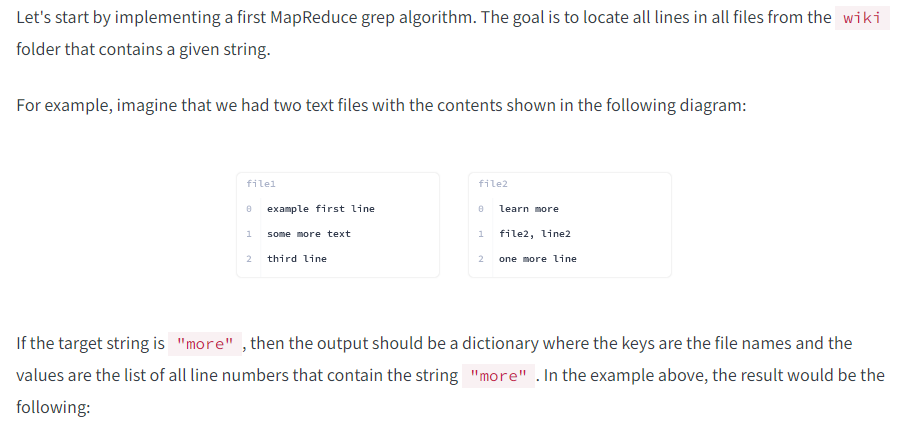

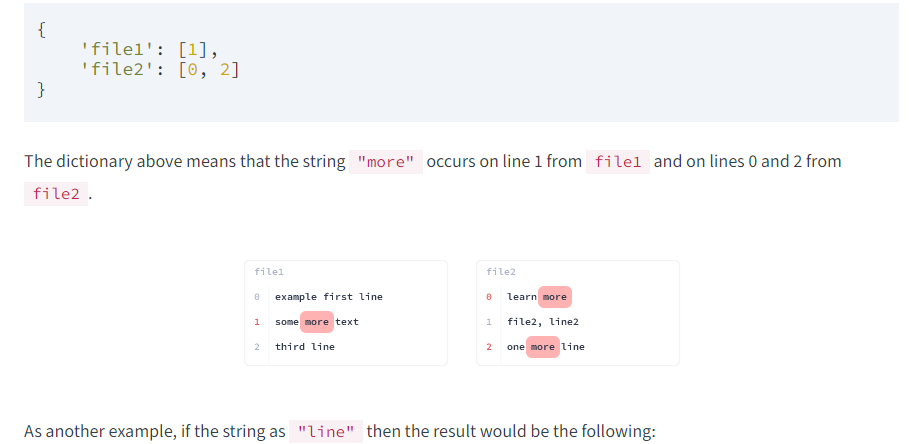

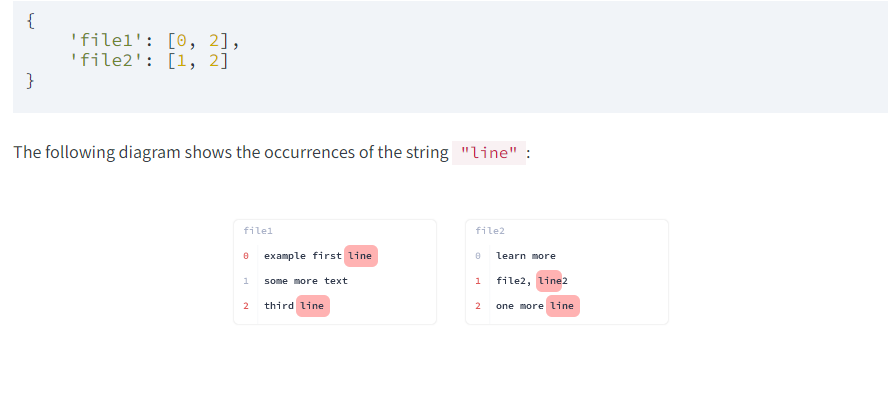

**Task**

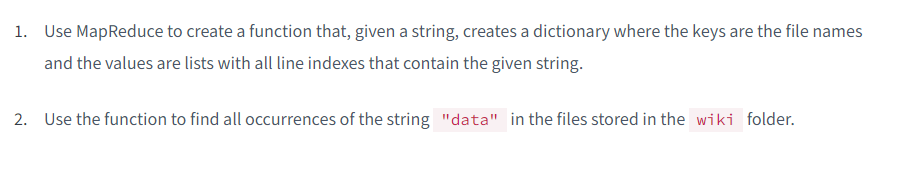

**Answer**

In [ ]:
# The target variable is defined outside and contains the string 
def map_grep(file_names):
    results = {}
    for fn in file_names:
        with open(fn) as f:
            lines = [line for line in f.readlines()]
        for line_index, line in enumerate(lines):
            if target in line:
                if fn not in results:
                    results[fn] = []
                results[fn].append(line_index)
    return results

def reduce_grep(lines1, lines2):
    lines1.update(lines2)
    return lines1

def mapreduce_grep(path, num_processes):
    file_names = [os.path.join(path, fn) for fn in os.listdir(path)]
    return map_reduce(file_names, num_processes,  map_grep, reduce_grep)

In [ ]:
# Finding the occurences of "data"

target = "data"
data_occurrences = mapreduce_grep("wiki", 8)

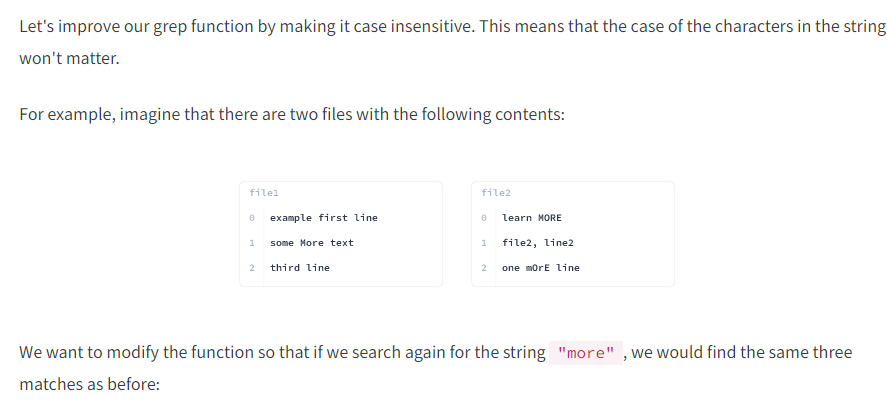

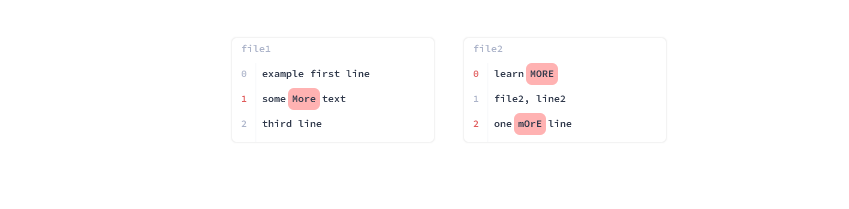

**Task**

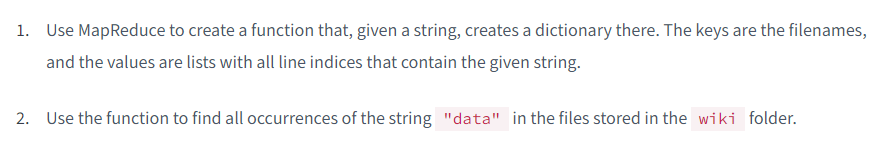

**Answer**

In [ ]:
# We can allow case insensitive matches by converting both the target and 
# the file contents to lowercase before we match.

def map_grep_insensitive(file_names):
    results = {}
    for fn in file_names:
        with open(fn) as f:
            lines = [line.lower() for line in f.readlines()]
        for line_index, line in enumerate(lines):
            if target.lower() in line:
                if fn not in results:
                    results[fn] = []
                results[fn].append(line_index)
    return results

def mapreduce_grep_insensitive(path, num_processes):
    file_names = [os.path.join(path, fn) for fn in os.listdir(path)]
    return map_reduce(file_names, num_processes,  map_grep_insensitive, reduce_grep)

target = "data"
new_data_occurrences = mapreduce_grep_insensitive("wiki", 8)

Let's verify that the new implementation works by seeing if it finds more matches than the previous implementation.

**Task**

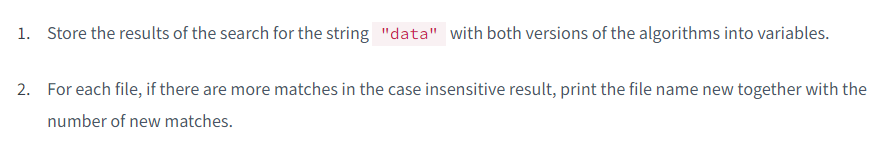

**Answer**

We already stored the results into variables `data_occurrences` and `new_data_occurrences`. To check that we find more matches with the second version of the algorithm, we can loop over the file names and print the length difference between the results.

In [ ]:
for fn in new_data_occurrences:
    if fn not in data_occurrences:
        print("Found {} new matches on file {}".format(len(new_data_occurrences[fn]), fn))
    elif len(new_data_occurrences[fn]) > len(data_occurrences[fn]):
        print("Found {} new matches on file {}".format(len(new_data_occurrences[fn]) - len(data_occurrences[fn]), fn))

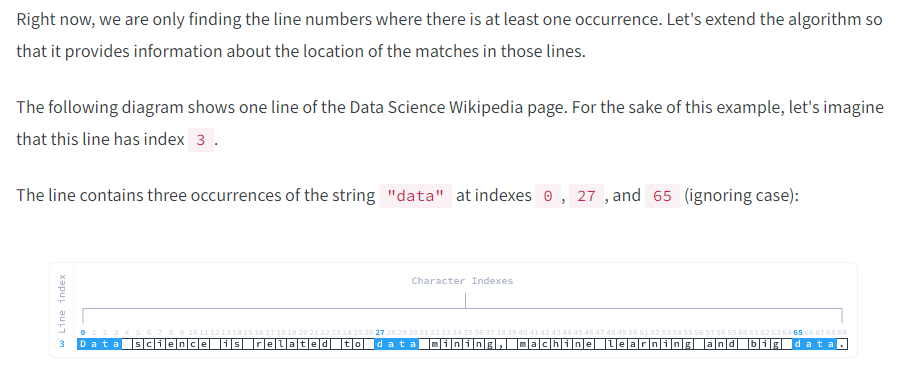

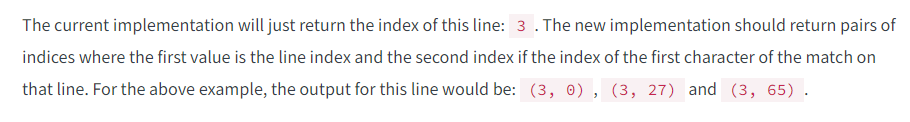

**Task**

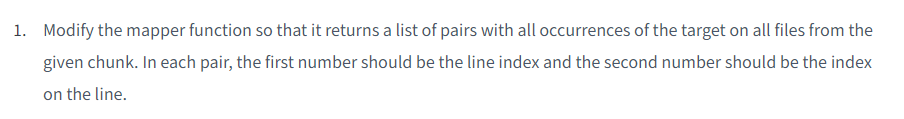

**Answer**

In [ ]:
def find_match_indexes(line, target):
    results = []
    i = line.find(target, 0)
    while i != -1:
        results.append(i)
        i = line.find(target, i + 1)
    return results

# Test implementation
s = "Data science is related to data mining, machine learning and big data.".lower()
print(find_match_indexes(s, "data"))

# Finding all match locations

We can use any of the above functions to find all match locations. We will use the third one.

After finding all indexes in one line, we need to create pairs by adding the line index.

In [ ]:
def map_grep_match_indexes(file_names):
    results = {}
    for fn in file_names:
        with open(fn) as f:
            lines = [line.lower() for line in f.readlines()]
        for line_index, line in enumerate(lines):
            match_indexes = find_match_indexes(line, target.lower())
            if fn not in results:
                results[fn] = []
            results[fn] += [(line_index, match_index) for match_index in match_indexes]
    return results

def mapreduce_grep_match_indexes(path, num_processes):
    file_names = [os.path.join(path, fn) for fn in os.listdir(path)]
    return map_reduce(file_names, num_processes,  map_grep_match_indexes, reduce_grep)

target = "science"
occurrences = mapreduce_grep_match_indexes("wiki", 8)

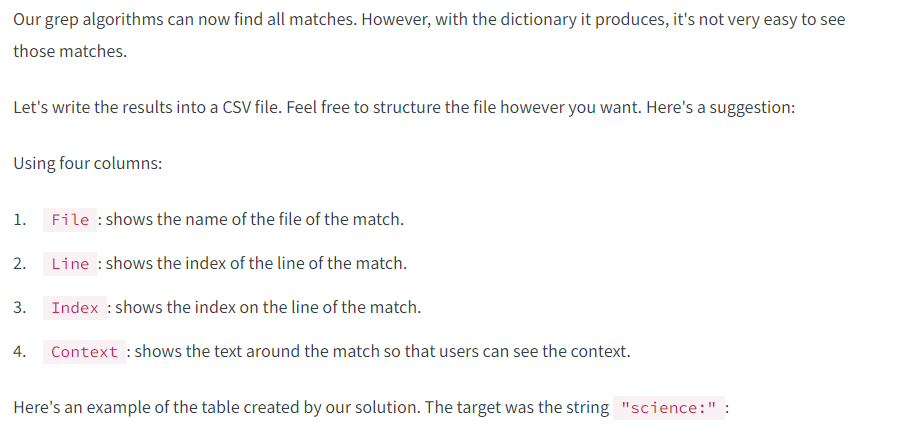

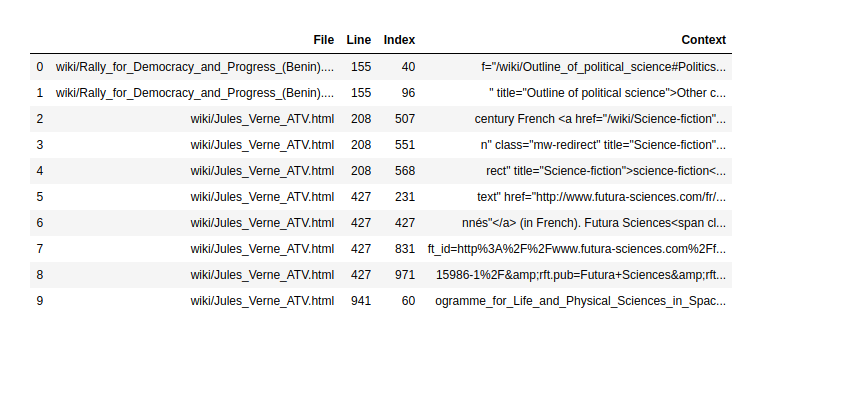

**Task**

Write the results in a CSV file in any format that we think is useful. Feel free to explore other ideas if we don't want to follow our suggestion.

**Answer**

### Displaying the results

Let's display the results. We will create a CSV file listing all occurrences. We will also show the text around each occurrence.

In [ ]:
import csv

# How many character to show before and after the match
context_delta = 30

with open("results.csv", "w") as f:
    writer = csv.writer(f)
    rows = [["File", "Line", "Index", "Context"]]
    for fn in occurrences:
        with open(fn) as f:
            lines = [line.strip() for line in f.readlines()]
        for line, index in occurrences[fn]:
            start = max(index - context_delta, 0)
            end   = index + len(target) + context_delta
            rows.append([fn, line, index, lines[line][start:end]])
    writer.writerows(rows)

In [ ]:
import pandas
df = pandas.read_csv("results.csv")
df.head(10)

Locating data from text files is a very common and time-consuming operation when many files are involved. By using MapReduce, we can significantly reduce the time required to locate that data.

In this project we've implemented a MapReduce grep algorithm that locates all matches of a given string within all files in a given folder.

There are many improvements we can add to our algorithm. (The grep command offers many other options.) We can read the [documentation](https://www.gnu.org/software/grep/manual/grep.html) if we're looking for inspiration on new improvements to implement.

Here are some ideas:

* Consider files located in subdirectories.
* Use the [`re` module](https://docs.python.org/3/library/re.html) to make it possible to search for [regular expressions](https://en.wikipedia.org/wiki/Regular_expression).
* Make it possible to specify the search options rather than having a search function for each set of options.